We use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-11-15 14:02:35--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.209.16, 13.227.209.121, 13.227.209.118, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.209.16|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

from pyearth import Earth
from pyearth import export

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-11-15   15     11  2020    205      12             Afghanistan    AF   
1 2020-11-14   14     11  2020     66      10             Afghanistan    AF   
2 2020-11-13   13     11  2020    360      14             Afghanistan    AF   
3 2020-11-12   12     11  2020    146       4             Afghanistan    AF   
4 2020-11-11   11     11  2020      0       0             Afghanistan    AF   
5 2020-11-10   10     11  2020    224      12             Afghanistan    AF   
6 2020-11-09    9     11  2020     80       3             Afghanistan    AF   
7 2020-11-08    8     11  2020    126       6             Afghanistan    AF   
8 2020-11-07    7     11  2020     58       2             Afghanistan    AF   
9 2020-11-06    6     11  2020     40       0             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           4.571293           
1                                           4.232191           
2                                           4.471402           
3                                           3.848403           
4                                           3.464614           
5                                           3.761656           
6                                           3.695939           
7                                           3.656508           
8                                           3.538217           
9                                           3.546103

Last check of our source dataframe.

In [4]:
df.count()

dateRep                                                       55722
day                                                           55722
month                                                         55722
year                                                          55722
cases                                                         55722
deaths                                                        55722
countriesAndTerritories                                       55722
geoId                                                         55722
countryterritoryCode                                          55628
popData2019                                                   55628
continentExp                                                  55722
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    52880
dtype: int64

We pivot to a country by column format.

In [5]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                          \
geoId          AD      AE     AF   AG   AI     AL      AM     AO       AR   
dateRep                                                                     
2019-12-31    NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN      NaN   
2020-01-01    NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN      NaN   
2020-01-02    NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN      NaN   
2020-01-03    NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN      NaN   
2020-01-04    NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN      NaN   
...           ...     ...    ...  ...  ...    ...     ...    ...      ...   
2020-11-11   40.0  1096.0    0.0  0.0  0.0  563.0  2000.0  247.0  11976.0   
2020-11-12   90.0  1214.0  146.0  0.0  0.0  507.0  1993.0  136.0  10880.0   
2020-11-13   49.0  1136.0  360.0  0.0  0.0  410.0  1703.0  137.0  11162.0   
2020-11-14  109.0  1226.0   66.0  2.0  0.0  490.0  1472.0  104.0  11859.0   
2020-11-15    0.0  1174.0  205.0  1.0  0.0  532.0  1482.0  171.0   8468.0   

                     ... deaths                                             \
geoId            AT  ...     VG   VI   VN   VU   WF    XK   YE     ZA   ZM   
dateRep              ...                                                     
2019-12-31      0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN   
2020-01-01      0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN   
2020-01-02      0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN   
2020-01-03      0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN   
2020-01-04      0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN   
...             ...  ...    ...  ...  ...  ...  ...   ...  ...    ...  ...   
2020-11-11   3839.0  ...    0.0  0.0  0.0  0.0  0.0   5.0  0.0  106.0  1.0   
2020-11-12   9643.0  ...    0.0  0.0  0.0  0.0  0.0   4.0  0.0   60.0  0.0   
2020-11-13  10368.0  ...    0.0  0.0  0.0  0.0  0.0   7.0  0.0   65.0  0.0   
2020-11-14   8962.0  ...    0.0  0.0  0.0  0.0  0.0  14.0  1.0   77.0  0.0   
2020-11-15   7192.0  ...    0.0  0.0  0.0  0.0  0.0  11.0  0.0   53.0  0.0   

                 
geoId        ZW  
dateRep          
2019-12-31  NaN  
2020-01-01  NaN  
2020-01-02  NaN  
2020-01-03  NaN  
2020-01-04  NaN  
...         ...  
2020-11-11  1.0  
2020-11-12  0.0  
2020-11-13  0.0  
2020-11-14  2.0  
2020-11-15  0.0  

[321 rows x 428 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [6]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths           \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VG  VI   VN   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ...   
2021-11-11   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-11-12   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-11-13   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-11-14   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-11-15   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   

                                        
geoId       VU  WF  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN NaN NaN NaN NaN NaN NaN  
2020-01-01 NaN NaN NaN NaN NaN NaN NaN  
2020-01-02 NaN NaN NaN NaN NaN NaN NaN  
2020-01-03 NaN NaN NaN NaN NaN NaN NaN  
2020-01-04 NaN NaN NaN NaN NaN NaN NaN  
...         ..  ..  ..  ..  ..  ..  ..  
2021-11-11 NaN NaN NaN NaN NaN NaN NaN  
2021-11-12 NaN NaN NaN NaN NaN NaN NaN  
2021-11-13 NaN NaN NaN NaN NaN NaN NaN  
2021-11-14 NaN NaN NaN NaN NaN NaN NaN  
2021-11-15 NaN NaN NaN NaN NaN NaN NaN  

[686 rows x 428 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [7]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    686.000000
mean     342.500000
std      198.175427
min        0.000000
25%      171.250000
50%      342.500000
75%      513.750000
max      685.000000
Name: daynum, dtype: float64

The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [8]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [9]:
country  = 'NL'          # ISO2 country code
measure  = 'cases'       # can be cases or deaths
smeasure = 'Week window' # smoothed
rmeasure = 'rcases'      # remaining
pmeasure = 'Model'       # projected
wmeasure = 'Wave '       # waves

# Initial wave number
wave = 1

# Initialize predicted measure, create smoothed measure and remaining cases
df_geo[(pmeasure, country)] = 0
df_geo[(smeasure, country)] = df_geo[measure][country].loc[:].rolling(7).mean()
df_geo[(rmeasure, country)] = df_geo[smeasure][country]

# Always plot smoothed and predicted measures, adding waves when found
plotlist = [(smeasure, country), (pmeasure, country)]

In [10]:
# Get full name and population from the original dataset
countryname = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
popdata = df[df['geoId'] == country]['popData2019'].iloc[0]

# We use 1 in a million cases, but at least 2
mincases = max(popdata / 1e6, 2)

In [11]:
print('Running multiple wave analysis for {} with population {:1.0f}'.format(countryname, popdata))
print('Minimum number of cases is {:1.0f}'.format(mincases))

while True:
    # Create potential wave
    curwave = wmeasure + str((wave) + 1000)[-2:]
    df_geo[(curwave, country)] = 0

    # Create a dataframe for predictions
    df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                            measure:df_geo[rmeasure][country]})

    # Create the Gumbel division and select suitable measures
    df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
    df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

    # Reduce to log scale and select relevant measures
    df_pred['linear'] = np.log(df_pred['gumdiv'])
    df_pred = df_pred[(df_pred['linear'] < -0.5) &
                      (df_pred['linear'] > -3.5)]

    # Do we still have data left?
    if len(df_pred) <= 1:
        print('--- no data left')
        break
    
    # Create input vectors for regression splines and build a model
    eax = df_pred['daynum'].values.reshape(-1, 1)
    eay = df_pred['linear'].values.reshape(-1, 1)
    #eamodel = Earth()
    #eamodel = Earth(minspan=0)
    eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
    eamodel.fit(eax, eay)

    # Store the results
    df_pred['earth'] = eamodel.predict(eax)

    # Find the day range
    daymin = df_pred['daynum'].min()
    daymax = df_pred['daynum'].max()

    # Find the gradient of generated regression splines
    #df_pred['gbgrad'] = np.gradient(df_pred['linear'])
    #df_pred['eagrad'] = np.gradient(df_pred['earth'])
    df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
    df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)
    
    # Knots are found when the gradient changes, including start and end
    df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                       (df_pred['daynum'] == (daymin + 1)) |
                       (df_pred['daynum'] == daymax))

    # Starting day of each spline
    df_pred['daycount'] = df_pred.reset_index().index

    # Select the knots and find the actual number of days for each spline
    df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
    df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
    df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

    # Candidate knots have a negative gradient and a minimum number of days
    df_knot['cand'] = ((df_knot['eagrad'] < -1/77) &
                       (df_knot['daysdata'] >= 3))

    # We want early knots with a low gradient and many days
    df_knot['since'] = df_knot['daynum'] - daymin
    df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
    df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

    # Did we find another wave?
    choice = df_knot[df_knot['choice']]
    if len(choice) == 0:
        print('--- no data for wave')
        break
    
    # Find the interval of the selected spline
    lower = choice['daynum'].values[0]
    upper = choice['daysdata'].values[0] + lower
    df_pred = df_pred[(df_pred['daynum'] >= lower) &
                      (df_pred['daynum'] <= upper)].copy()

    # Calculate slope and intercept as basis for beta and mu
    fitmod = export.export_python_function(eamodel)
    slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
    intercept = fitmod([[lower]])[0] - (lower * slope)
    beta = - 1 / slope
    mu = beta * (intercept + np.log(beta))

    # Apply the Gumbel PDF according to beta and mu and find the scale
    df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
    df_pred['scale'] = df_pred[measure] / df_pred['pgumb']
    final = df_pred['scale'].mean()
    fincv = df_pred['scale'].std() / final

    # Calculate the current wave and its parameters
    df_geo[(curwave, country)] = final * gumpdf(df_geo['daynum'], beta, mu)
    peak = df_geo[df_geo[(curwave, country)] == df_geo[(curwave, country)].max()].index.min()
    start = df_geo[(df_geo[(curwave, country)] >= 1) &
                   (df_geo[(curwave, country)].index < peak)].index.min()
    floor = df_geo[(df_geo[(curwave, country)] < 1) &
                   (df_geo[(curwave, country)].index > peak)].index.min()
    print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
        curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))

    # Move the data from remainder to prediction
    df_geo[(pmeasure, country)] += df_geo[(curwave, country)]
    df_geo[(rmeasure, country)] -= df_geo[(curwave, country)]
    plotlist += [(curwave, country)]
    wave += 1

Running multiple wave analysis for Netherlands with population 17282163
Minimum number of cases is 17
Wave 01 beta  9.848 mu  81 fit 0.878 peak 2020-03-21 from 2020-03-01 to 2020-05-16 size 2798
Wave 02 beta 11.555 mu  96 fit 0.838 peak 2020-04-05 from 2020-03-10 to 2020-07-05 size 29172
Wave 03 beta  2.900 mu  93 fit 0.631 peak 2020-04-02 from 2020-03-27 to 2020-04-17 size 540
Wave 04 beta  8.155 mu 112 fit 0.776 peak 2020-04-21 from 2020-04-03 to 2020-06-20 size 11407
Wave 05 beta  4.422 mu 138 fit 0.852 peak 2020-05-17 from 2020-05-08 to 2020-06-11 size 1154
Wave 06 beta  6.509 mu 151 fit 0.919 peak 2020-05-30 from 2020-05-17 to 2020-07-08 size 2361
Wave 07 beta  7.676 mu 168 fit 0.795 peak 2020-06-16 from 2020-05-31 to 2020-08-01 size 3023
Wave 08 beta  5.995 mu 190 fit 0.921 peak 2020-07-08 from 2020-06-27 to 2020-08-05 size 638
Wave 09 beta 10.606 mu 212 fit 0.918 peak 2020-07-30 from 2020-07-08 to 2020-10-04 size 5046
Wave 10 beta 12.359 mu 233 fit 0.862 peak 2020-08-20 from 202

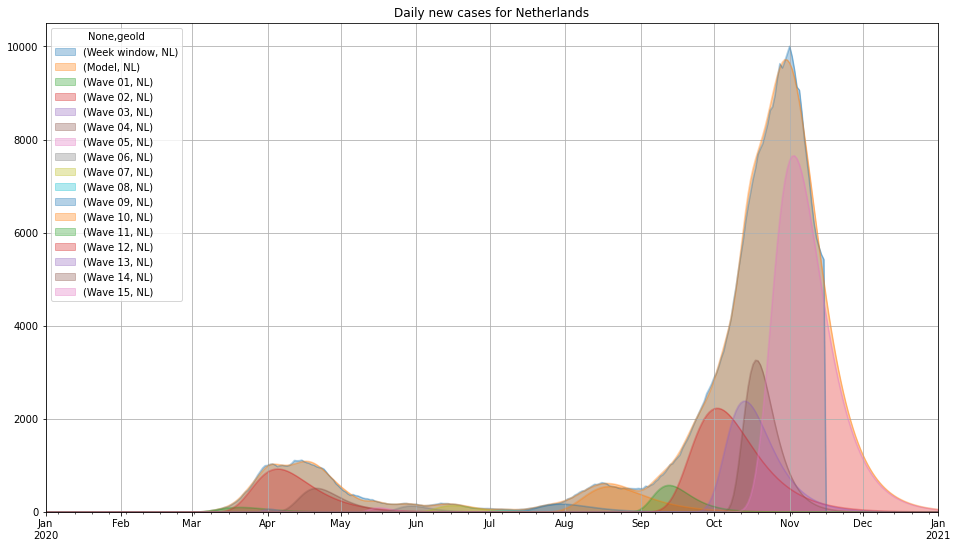

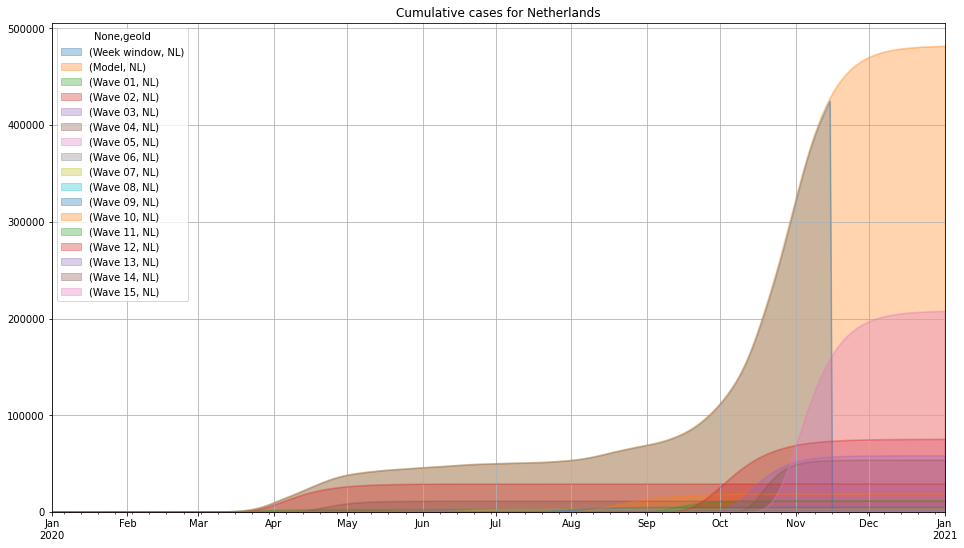

In [12]:
df_geo[plotlist].loc['20200101':'20210101'].plot(
    figsize=(16, 9),
    grid=True,
    kind='area',
    stacked=False,
    alpha=1/3,
    title='Daily new cases for '+countryname)
df_geo[plotlist].loc['20200101':'20210101'].cumsum().plot(
    figsize=(16, 9),
    grid=True,
    kind='area',
    stacked=False,
    alpha=1/3,
    title='Cumulative cases for '+countryname)

We have the estimate for the final number of cases, so the progress would be the current number of cases divided by the final number. This could end up over 100%, if we estimate that the current wave of the outbreak is over and new cases are due to relaxing of measures, increase in testing or other factors.

In [13]:
progress = df_geo[measure][country].sum() / df_geo[pmeasure][country].sum()
print('Currently at {:1.2f}% of {:1.0f}'.format(progress * 100, df_geo[pmeasure][country].sum()))

Currently at 91.68% of 482034


The peak date is at the maximum value.

In [14]:
peak = df_geo[df_geo[(pmeasure, country)] == df_geo[(pmeasure, country)].max()].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-10-30


This date should closely match the `mu` of our distribution, in days since the start of the index.

In [15]:
print('Peak by last mu at {}'.format(df_geo.loc[df_geo['daynum'] == mu.astype(int)].index[0].date()))

Peak by last mu at 2020-11-02


The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [16]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2021-01-14


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [17]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-03-07


We define the maximum delta as the day in the curve with the sharpest rise.

In [18]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 436 on 2020-10-13


This should match the maximum gradient of the daily data.

In [19]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pmeasure, country)]).max()))

Maximum gradient is 433


Back to the original curve, showing the number of infected concurrently.

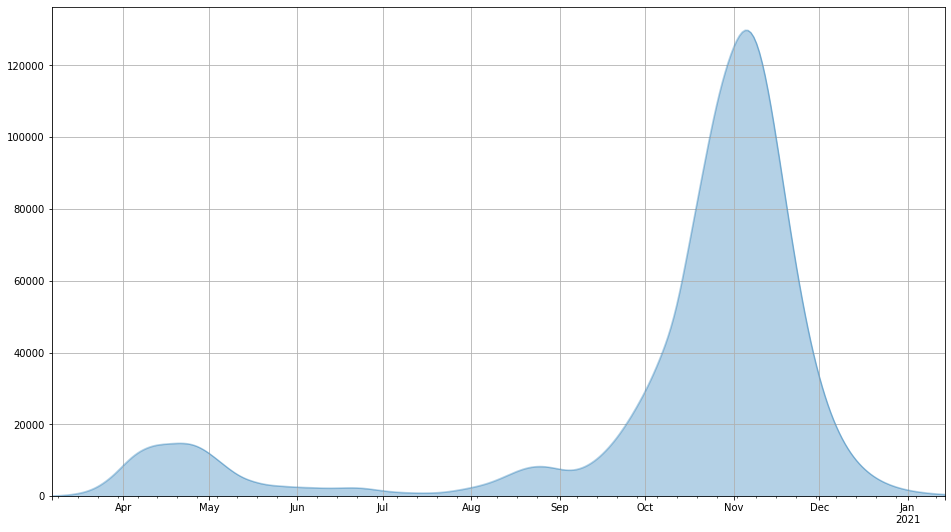

In [20]:
df_geo[pmeasure][country].rolling(14).sum().loc[start:floor].plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

The top of this curve gives the maximum number of people that are infected at the same time.

In [21]:
print('Maximum infected is {:1.0f}'.format(df_geo[pmeasure][country].rolling(14).sum().max()))

Maximum infected is 129764


If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

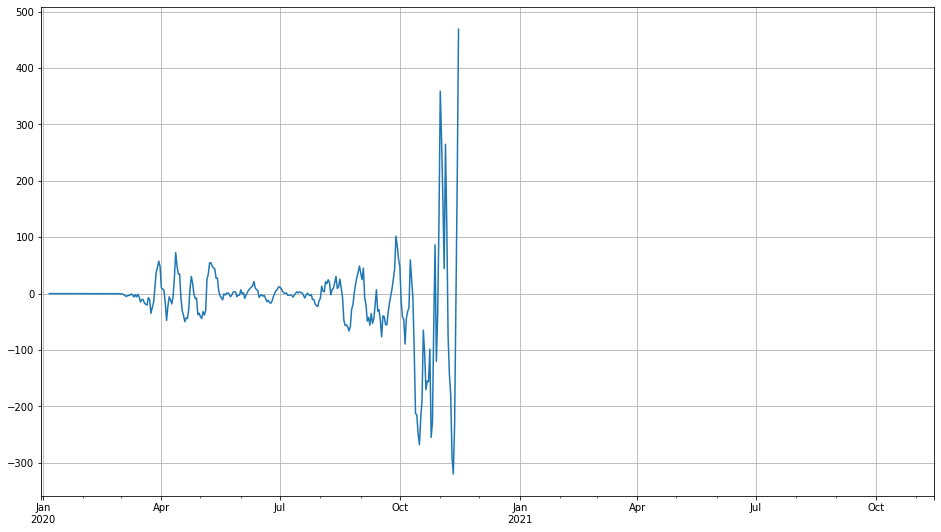

In [22]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).rolling(1).mean().loc[:].plot(
    figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.